# Camera Calibration
## Camera Calibration using Chessboard images

In [18]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle

grid_x = 9
grid_y = 6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((grid_y*grid_x,3), np.float32)
objp[:,:2] = np.mgrid[0:grid_x, 0:grid_y].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
imgs = []

# Make a list of calibration images
img_fnames = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(img_fnames):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (grid_x, grid_y), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        imgs.append(img)
        
h, w = imgs[0].shape[:2]
img_size = (w, h)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "./camera_cal_pickle.p", "wb" ) )

## Visualization of Undistortion

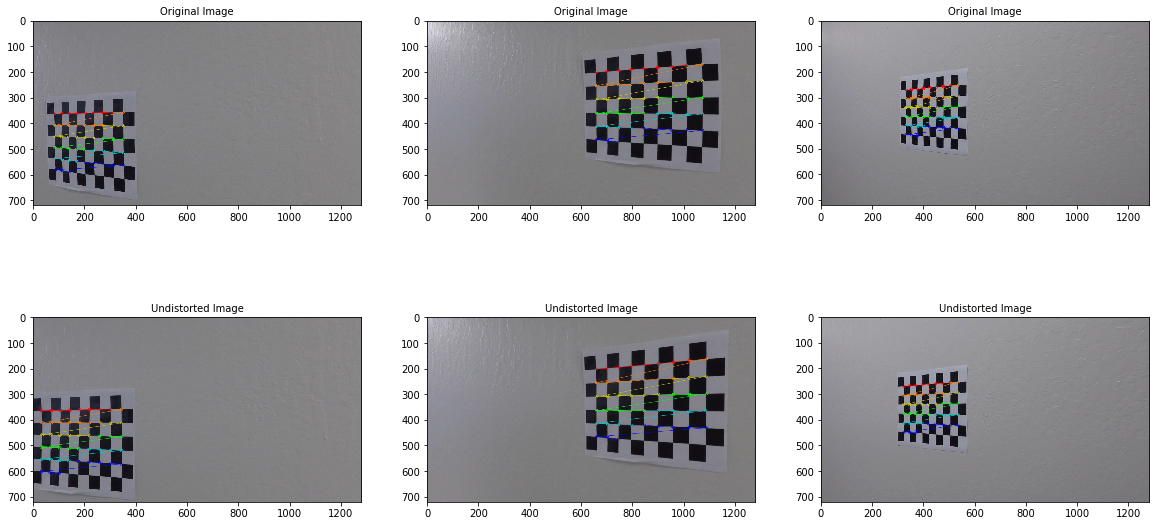

In [20]:
%matplotlib inline
f, subplots = plt.subplots(2, 3, figsize=(20,10))

for idx, img in enumerate(imgs[:3]):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    subplots[0][idx].imshow(img)
    subplots[0][idx].set_title('Original Image', fontsize=10)
    subplots[1][idx].imshow(dst)
    subplots[1][idx].set_title('Undistorted Image', fontsize=10)

# Pipeline
## Pipeline  on Test Images

## Pipeline  on Video

In [21]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [23]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    #result = lane_trace(image)
    result = image
    return result

In [24]:
white_output = 'result_project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video result_project_video.mp4
[MoviePy] Writing video result_project_video.mp4


 32%|███▏      | 399/1261 [00:08<00:29, 28.99it/s]

KeyboardInterrupt: 

 31%|███▏      | 395/1261 [00:20<00:43, 19.73it/s]

In [25]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Pipeline  on Optional Videos
### Challenge

In [ ]:
challenge_output = 'result_challenge_video.mp4'
clip2 = VideoFileClip('challenge_video.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

### Harder Challenge

In [ ]:
harder_challenge_output = 'result_challenge_video.mp4'
clip3 = VideoFileClip('harder_challenge_video.mp4')
harder_challenge_clip = clip3.fl_image(process_image)
%time harder_challenge_clip.write_videofile(harder_challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(harder_challenge_output))